#Task 1 : TITANIC SURVIVAL PREDICTION

#Imports

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load DataSet

In [ ]:
df =pd.read_csv('Titanic-Dataset.csv')

#Display the dataset

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Clean the age values

In [ ]:
df['Age'] =df['Age'].fillna(df['Age'].mean())

#Convert the variables to nums

In [ ]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

#Drop unnecessary Columns

In [ ]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =1)

# Split data

In [ ]:
x=df.drop('Survived', axis=1)
y=df['Survived']

#Visualisation

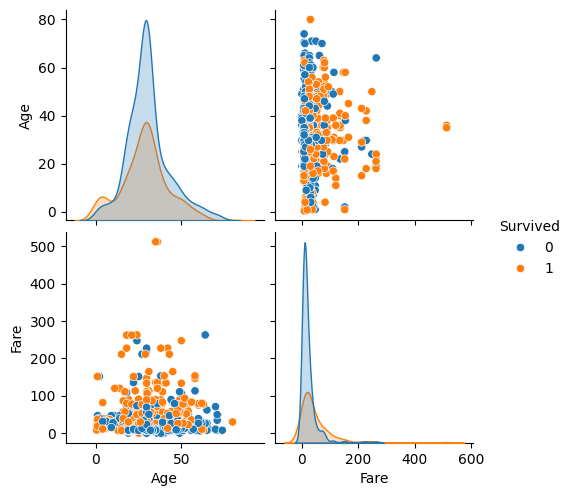

In [ ]:
sns.pairplot(df[['Age','Fare','Survived']], hue='Survived')

# Import StatsModel and add input features

In [ ]:
import statsmodels.api as sm
X=sm.add_constant(x)

#Check if the data is clean, if not get cleaned

In [ ]:
if X.isnull().sum().sum()>0:
  X = X.fillna(X.mean())

if np.isinf(X).sum().sum()>0:
  X=X.replace([np.inf, -np.inf], np.nan)
  X=X.fillna(X.mean())

# Create the Model

In [ ]:
model = sm.Logit(y,X)

# Train the model

In [ ]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.440744
         Iterations 6


#Print a summary of the model

In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.3381
Time:                        11:49:21   Log-Likelihood:                -392.70
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.287e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2202      0.481      4.620      0.000       1.278       3.162
Pclass        -1.1236      0.141     -7.951      0.000      -1.401      -0.847
Sex            2.7154      0.200     13.599      0.0

#Prediction of the test

In [ ]:
y_p = result.predict(X)

#Conver to Binary

In [ ]:
y_pre_binary = np.where(y_p >= 0.5,1,0)

#Evalutae the Model

In [ ]:
accuracy = np.mean(y_pre_binary == y)
print(f"Accuracy : {round(accuracy * 100, 2)} % ")

Accuracy : 80.13 % 
